# Задание
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

0.6734396116428514
1.5957691216057308


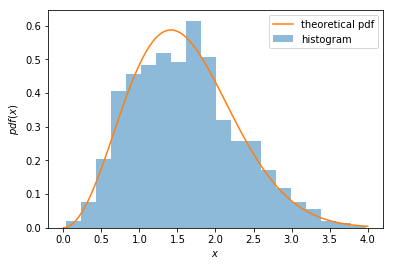

1.270292688596746


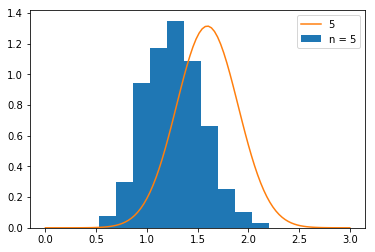

1.4335169896607227


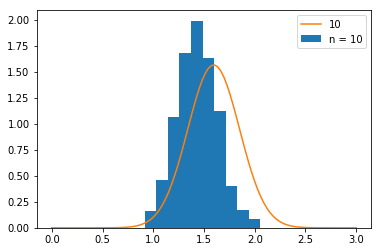

1.5606910950063793


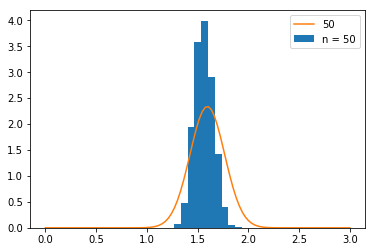

In [64]:
import pandas as pd
import math
import numpy as np
from scipy.stats import maxwell
import matplotlib.pyplot as plt
from numpy import *
import scipy.stats as sts

#Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; 
#попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 
#Сгенерируйте из него выборку объёма 1000

maxwell_rv = sts.maxwell(0, 1)
sample = maxwell_rv.rvs(1000) #выборочные значения функции распределения
# Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии: 
# дисперсия = sigma**2 * (3 * pi - 8.0) / pi

sigma = maxwell_rv.std() #стандартное отклонение
srednee = maxwell_rv.mean() #среднее, мат.ож 
#print srednee
dispersion = sigma**2 * (3 * pi - 8.0) / pi # дисперсия по ст.откл
print sigma
print srednee

#постройте гистограмму выборки 
plt.hist(sample, bins=20, label='histogram', normed=True, alpha=0.5)

#нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины 
#(чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True)

x = np.linspace(0,4,100)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$pdf(x)$')
plt.xlabel('$x$')
plt.show()

# сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. n = 5
sr = mean(sample)
#print sr
sred = 0.0
sredlist = list()
n = 5
N = float(n)
for i in range(1000):
    for j in range(n-1):
        sred = maxwell_rv.rvs() + sred
        j +=1
    sredlist.append(sred/N)
    sred = 0
    i += 1
plt.hist(sredlist, label='n = 5', normed=True)
srednee_spiska_5 = sum([i for i in sredlist])/1000.0
print srednee_spiska_5
# посчитайте значения параметров нормальных распределений, 
# которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.
# Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения
std_5 = (dispersion / 5.0**0.5)**0.5

norm_rv_5 = sts.norm(srednee, std_5)
x = np.linspace(0.0,3.0,100)
pdf_5 = norm_rv_5.pdf(x)
plt.plot(x, pdf_5, label='5')
plt.legend()
plt.show()

# сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. n = 10
sr = mean(sample)
#print sr
sred_10 = 0.0
sredlist_10 = list()
n = 10
N = float(n)
for i in range(1000):
    for j in range(n-1):
        sred_10 = maxwell_rv.rvs() + sred_10
        j +=1
    sredlist_10.append(sred_10/N)
    sred_10 = 0
    i += 1
plt.hist(sredlist_10, label='n = 10', normed=True)
srednee_spiska_10 = sum([i for i in sredlist_10])/1000.0
print srednee_spiska_10

# посчитайте значения параметров нормальных распределений, 
# которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.
# Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения
std_10 = (dispersion / 10.0**0.5)**0.5

norm_rv_10 = sts.norm(srednee, std_10)
x = np.linspace(0,3,100)
pdf_10 = norm_rv_10.pdf(x)
plt.plot(x, pdf_10, label='10')
plt.legend()
plt.show()

# сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. n = 50
sr = mean(sample)
#print sr
sred_50 = 0.0
sredlist_50 = list()
n = 50
N = float(n)
for i in range(1000):
    for j in range(n-1):
        sred_50 = maxwell_rv.rvs() + sred_50
        j +=1
    sredlist_50.append(sred_50/N)
    sred_50 = 0
    i += 1
plt.hist(sredlist_50, label='n = 50', normed=True)
srednee_spiska_50 = sum([i for i in sredlist_50])/1000.0
print srednee_spiska_50
# посчитайте значения параметров нормальных распределений, 
# которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.
# Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения
std_50 = (dispersion / 50.0**0.5)**0.5

norm_rv_50 = sts.norm(srednee, std_50)
x = np.linspace(0,3,100)
pdf_50 = norm_rv_50.pdf(x)
plt.plot(x, pdf_50, label='50')
plt.legend()
plt.show()

# Ответ 

С нормальнным ростом n точность аппроксимации распределения выборочных средних возрастает